<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva (encontrar la vista aérea)  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/carretera.png" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Actividad 2-A

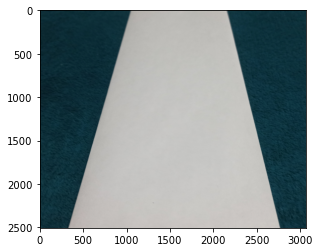

In [2]:
#Obtenga una imagen por medio de su celular 
img = cv.imread("figuras/carretera.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

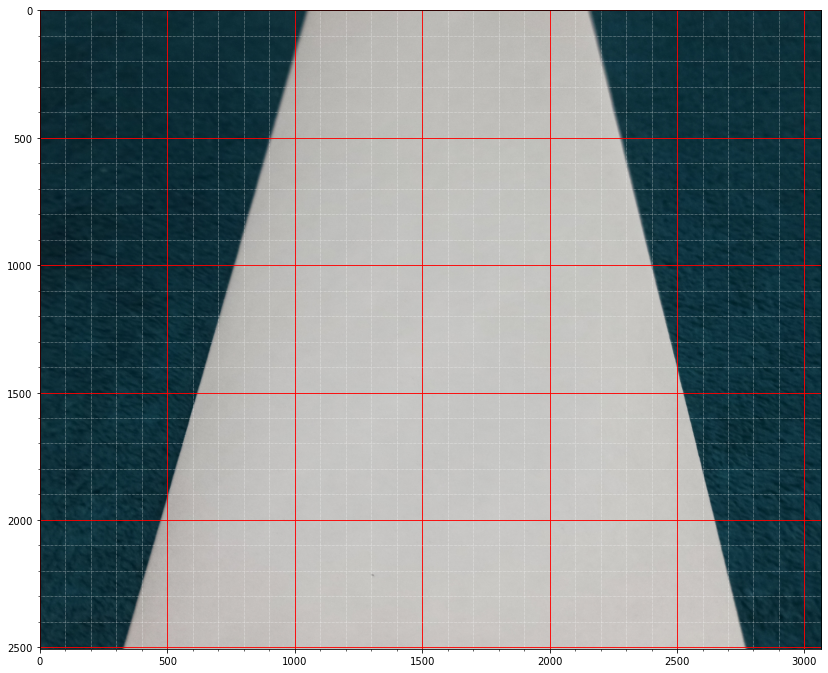

In [3]:
#Ampliar y mejorar la visibilidad del plano cartesiano
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

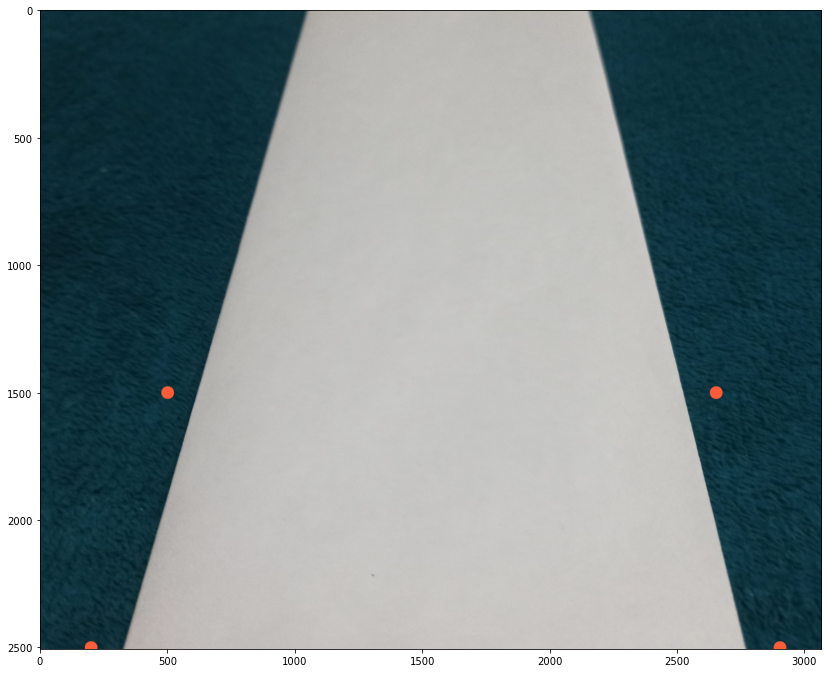

In [4]:
#Puntos de las esquinas de la zona de interés
imgs = cv.imread("figuras/carretera.jpg")
imgs = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,14))
cv.circle(imgs, (500,1500), 25, (255, 92, 58), -1) ;
cv.circle(imgs, (2650,1500), 25, (255, 92, 58), -1) ;
cv.circle(imgs, (200,2500), 25, (255, 92, 58), -1) ;
cv.circle(imgs, (2900,2500), 25, (255, 92, 58), -1) ;
plt.imshow(imgs)
plt.show()

In [5]:
#Obteniendo la matriz de transformación y cambiando de perspectiva
pts1 = np.float32([[500,1500], [2650,1500], [200,2500], [2900,2500]])
pts2 = np.float32([[0, 0], [480, 0], [0, 240], [480, 240]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img, matrix, (480,240))
print("forma de matrix: ", matrix.shape)
print("forma de img_warp: ", img_warp.shape)

forma de matrix:  (3, 3)
forma de img_warp:  (240, 480, 3)


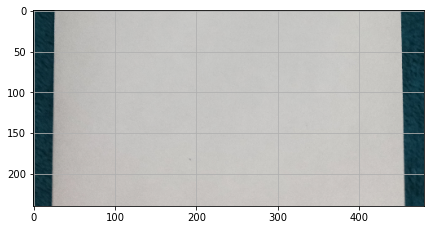

In [6]:
#Imagen final 
plt.figure(figsize=(7,10))
plt.imshow(img_warp)
plt.grid()
plt.show()

## Resultados de la Actividad 2-A 

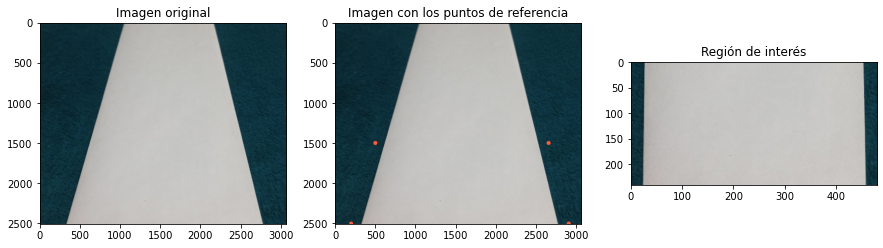

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Imagen original")
plt.subplot(1,3,2)
plt.imshow(imgs)
plt.title("Imagen con los puntos de referencia")
plt.subplot(1,3,3)
plt.imshow(img_warp)
plt.title("Región de interés")
plt.show()

# Actividad 2-B

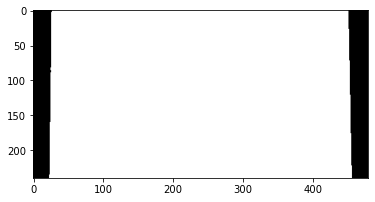

In [8]:
# Se binariza la región de interés de la fotografía
img_gray = cv.cvtColor(img_warp, cv.COLOR_BGR2GRAY)
img_gauss = cv.GaussianBlur(img_gray,(3,3),0)
thr, img_thr= cv.threshold(img_gauss ,108 ,255,cv.THRESH_BINARY)
plt.imshow( img_thr,cmap='gray')
plt.show()

## Resultados de la Actividad 2-B

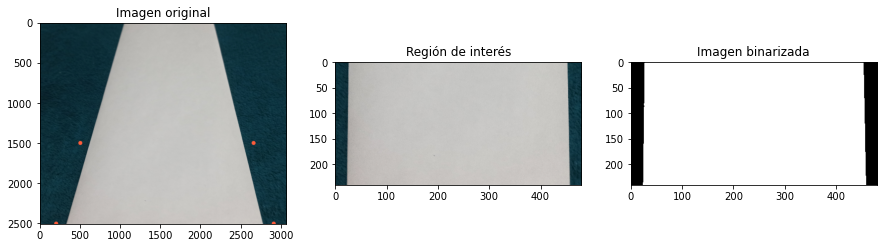

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(imgs)
plt.title("Imagen original")
plt.subplot(1,3,2)
plt.imshow(img_warp)
plt.title("Región de interés")
plt.subplot(1,3,3)
plt.imshow(img_thr,cmap='gray')
plt.title("Imagen binarizada")
plt.show()